<a href="https://colab.research.google.com/github/PuruBhatnagar1197/Machine-Learning-Revision/blob/main/Adaboost_HYperparamters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import matplotlib.pyplot as plt

In [29]:
x,y=make_classification(n_samples=100,n_features=2,n_informative=2,n_redundant=0,random_state=42)

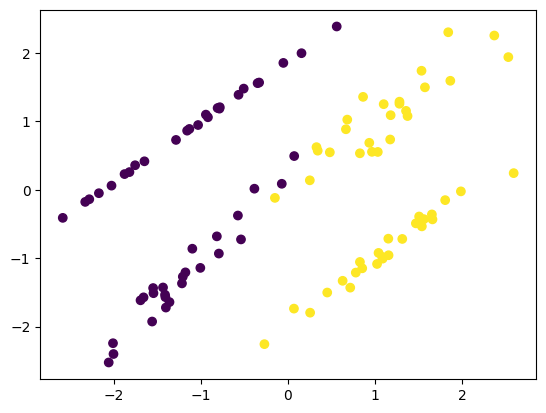

In [30]:
plt.scatter(x[:,0],x[:,1],c=y)

In [31]:
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [32]:
clf_ada=AdaBoostClassifier()

In [33]:
clf_ada.fit(x,y)

AdaBoostClassifier()

In [34]:
# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test,clf_ada.predict(x_test)))

np.mean(cross_val_score(clf_ada,x,y,scoring='accuracy',cv=10))

0.97

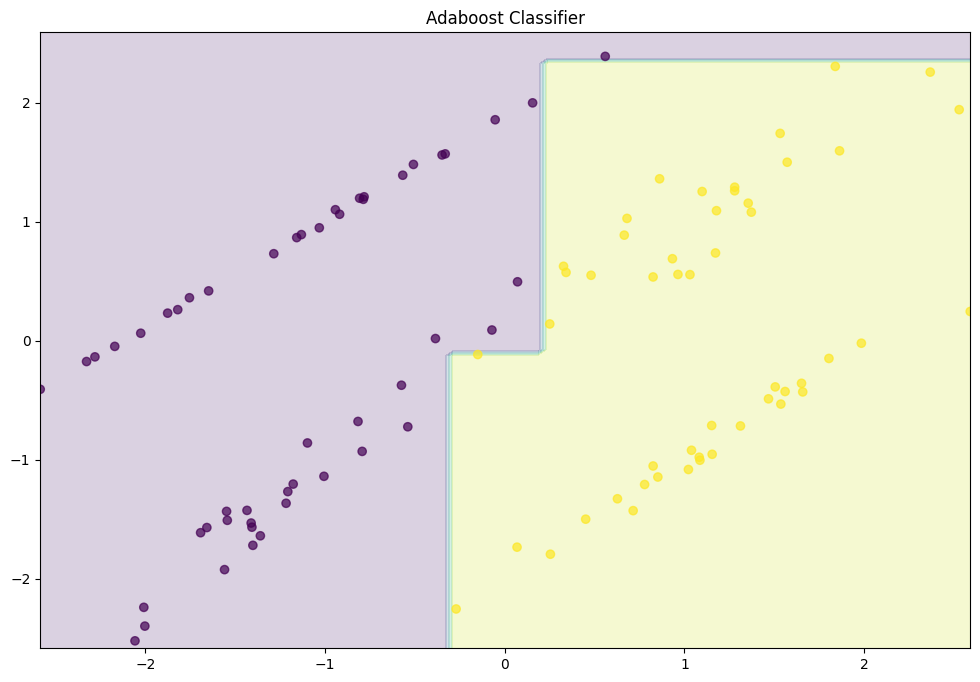

In [36]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(x.min(), x.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()

plot_decision_boundary(clf_ada)

In [37]:
cl_ada1=AdaBoostClassifier(n_estimators=10,learning_rate=0.1)

In [39]:
np.mean(cross_val_score(cl_ada1.fit(x,y),x,y,scoring='accuracy',cv=10))


0.9400000000000001

In [41]:
### using hyperparamter tuning
param_grid={
    'n_estimators':[10,20,30,40,100],
    'learning_rate':[0.1,0.3,0.5,0.34],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [44]:
grid_algo=GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, cv=10,n_jobs=-1,scoring='accuracy')
grid_algo.fit(x,y)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.3, 0.5, 0.34],
                         'n_estimators': [10, 20, 30, 40, 100]},
             scoring='accuracy')

In [46]:
print(grid_algo.best_params_)

{'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 100}


In [45]:
print(grid_algo.best_score_)

0.97
